Basic Setup

In [1]:
from __future__ import division, print_function, unicode_literals

In [2]:
import numpy as np

In [3]:
import matplotlib

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt


Lets make a 1D Pseudodata set with two gaussians

In [5]:
mu = 0
sigma = 0.5
PSData1 = np.random.normal(0, sigma, 1000)
PSData2 = np.random.normal(1.5, sigma,500)
PSData = np.append(PSData1,PSData2)



Now plot it with some bins

In [6]:
bins = np.linspace(-2,3,50)


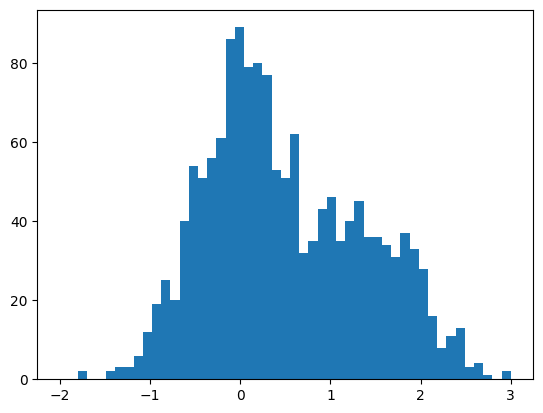

In [7]:
plt.hist(PSData,bins=bins)
plt.show()

Make a MC sample that models one of the components

In [14]:
MC = np.random.normal(1.5, sigma,500)

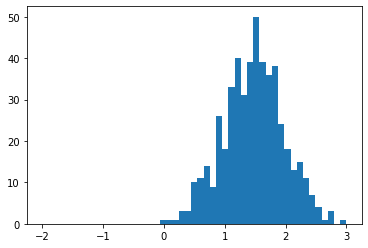

In [15]:
plt.hist(MC,bins=bins)
plt.show()

Overlaid

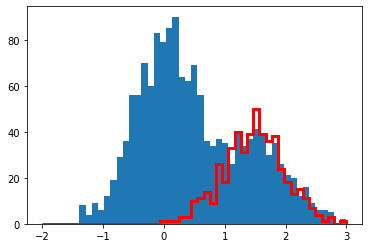

In [51]:
binnedPSData = plt.hist(PSData,bins=bins)
binnedMC     = plt.hist(MC, bins=bins,histtype='step',linewidth=3,color='r')
plt.show()


There is another way to make histograms using the binned datat that we will need for the subtracation

the plot.hist call actually returns the binned data and the bins

In [32]:
print(binnedPSData[0])

[ 0.  0.  0.  0.  0.  0.  8.  4.  9.  6. 12. 19. 29. 36. 56. 56. 70. 60.
 83. 79. 85. 90. 64. 62. 69. 56. 36. 34. 37. 35. 26. 40. 34. 37. 41. 39.
 30. 35. 26. 21. 20. 12. 16.  9.  6.  6.  5.  0.  2.]


Can also make a histogram directly from the binned data, but here we need the bin centers

In [33]:
binCenters = [(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]


Sanity check that these give the ssame results

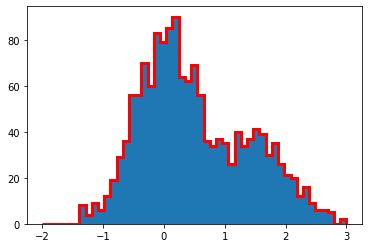

In [50]:
plt.hist(binCenters,bins=bins,weights=binnedPSData[0])
plt.hist(PSData,bins=bins,histtype='step',linewidth=3,color='r')
plt.show()

Can use this second way of making a histrogram to do the bin-by-bin subtraction

In [37]:
PSSubtracted = binnedPSData[0] - binnedMC[0]

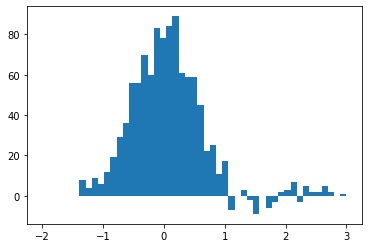

In [39]:
plt.hist(binCenters,bins=bins,weights=PSSubtracted)
plt.show()

Now compare the subtracted histogram to the  model of "G1"

In [40]:
PSData1_test = np.random.normal(0, sigma, 1000)


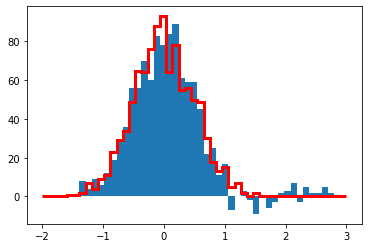

In [48]:
plt.hist(binCenters,bins=bins,weights=PSSubtracted)
plt.hist(PSData1_test,bins=bins,histtype='step',linewidth=3,color='r')
plt.show()